In [1]:
import pandas as pd
import numpy as np

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
daf = pd.read_csv(r'C:\Users\Acer\Desktop\Machine Learning Models\Dataset\URL_ExtractedFeatures.csv')
daf.shape

(11430, 46)

# Dataframe Splitting

In [3]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def generate_accuracy_and_heatmap(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.2f}".format(accuracy_score(y,model.predict(x))*100)
    f_score = "{:.2f}".format(f1_score(y,model.predict(x))*100)
    print('Accuracy : ', ac,'%')
    print('F1 : ', f_score,'%')
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

In [5]:
numerical_feature_columns = list(daf._get_numeric_data().columns)
numerical_feature_columns

['status_enc',
 'url_length',
 'url_dot',
 'url_slash',
 'url_hyphen',
 'url_at',
 'url_underline',
 'url_plus',
 'url_hashtag',
 'url_digits',
 'url_special',
 'url_percent',
 'url_equal',
 'url_and',
 'url_qm',
 'uppercase_count',
 'uppercase_ratio',
 'digits_ratio',
 'domain_length',
 'subdomain_len',
 'domain_digits',
 'domain_scheme',
 'domain_dots',
 'domain_vowels',
 'tld_enc',
 'subdomain_enc',
 'port_enc',
 'dir_presence',
 'dir_heirarchy',
 'dir_slash',
 'dir_hyphen',
 'dir_digits',
 'dir_percentage',
 'filetype_length',
 'query_presence',
 'query_length',
 'query_hyphen',
 'query_equal',
 'query_at',
 'query_digits',
 'Qdigits_ratio',
 'filetype_enc',
 'short_url',
 'redirection',
 'url_email',
 'url_validation']

In [6]:
target = 'status_enc'

<AxesSubplot:>

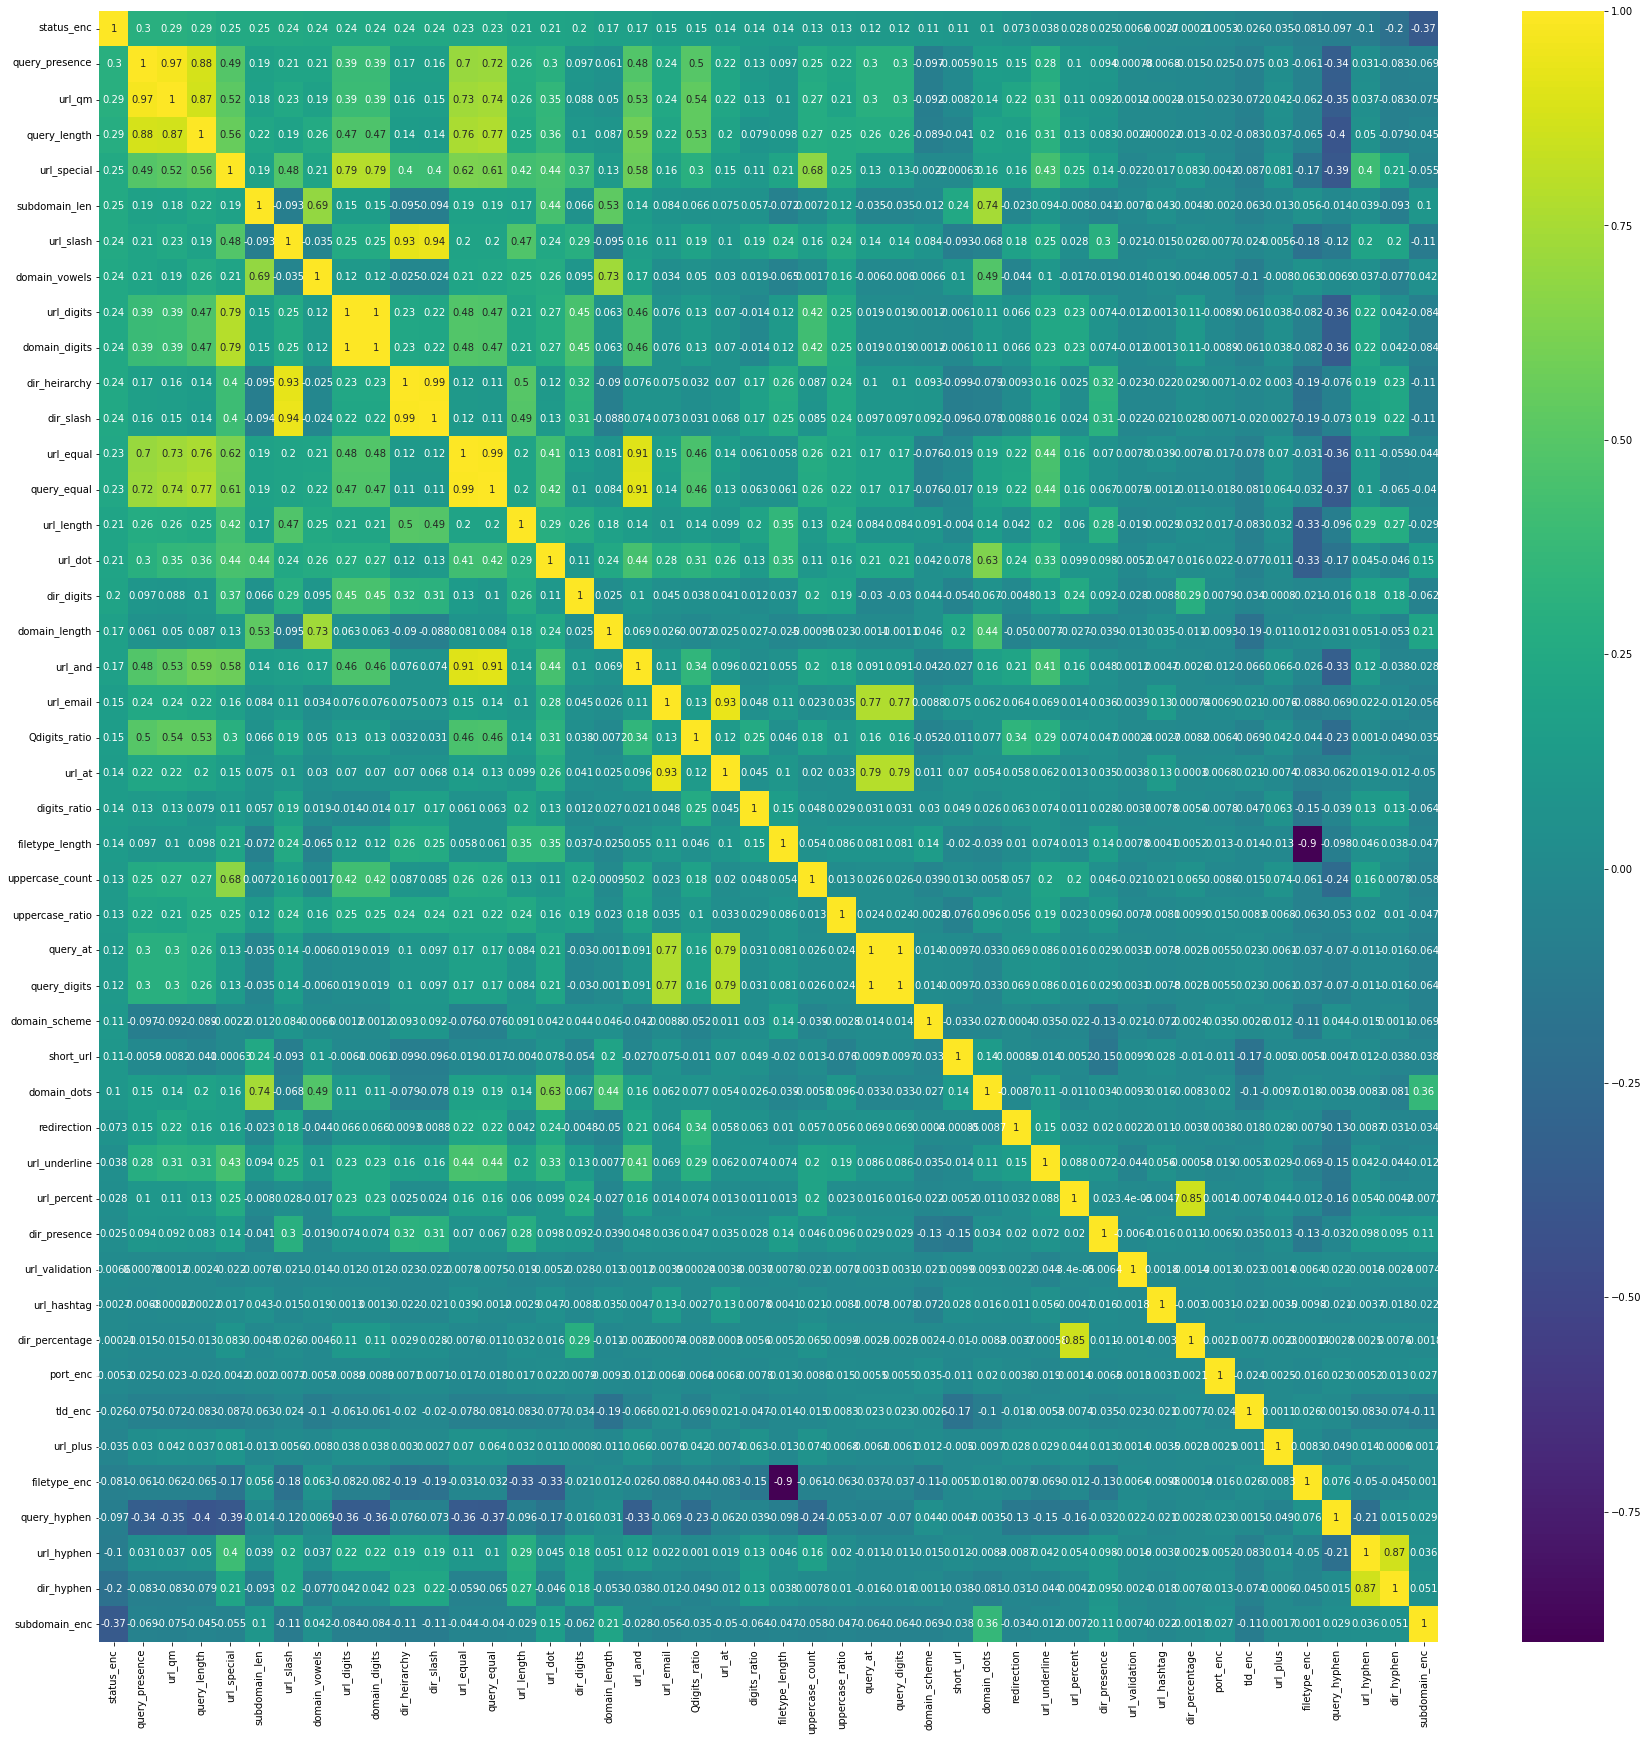

In [7]:
k = 46 #number of variables for heatmap
cols = daf[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = daf[cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
X = daf.loc[:, daf.columns != target]
Y = daf.loc[:, daf.columns == target]

In [9]:
X.shape

(11430, 45)

In [10]:
Y.shape

(11430, 1)

In [11]:
# Y = daf['status_enc']
# X = daf.drop('status_enc',axis=1)
# X.shape, Y.shape

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 , shuffle = False)

In [13]:
X_train.shape

(9144, 45)

In [14]:
Y_test['status_enc'].value_counts()

0    1176
1    1110
Name: status_enc, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(random_state=0 , max_depth=18)

classifier.fit(X_train, Y_train)

Y_predict = classifier.predict(X_test)

Accuracy :  86.13 %
F1 :  85.78 %
Y axis : Actual Value.
X axis : Predicted Value.


1

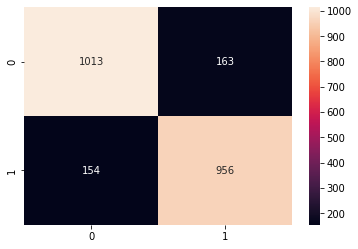

In [16]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)
generate_accuracy_and_heatmap(classifier, X_test, Y_test)

# FEATURE SELECTION

In [17]:
select_feature = SelectKBest(chi2, k=44).fit(X_train, Y_train)

In [18]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

Feature         Scores
24    subdomain_enc  836217.203403
9       url_special   27824.224596
19    domain_digits   25272.287479
8        url_digits   25272.287479
14  uppercase_count   11007.324153
18    subdomain_len    8934.911318
15  uppercase_ratio    7338.711061
30       dir_digits    6428.043337
16     digits_ratio    4772.109964
39    Qdigits_ratio    3171.001582
34     query_length    1821.608818
29       dir_hyphen    1753.129869
11        url_equal    1607.101721
36      query_equal    1589.478533
22    domain_vowels    1063.936193
12          url_and    1010.846373
13           url_qm     740.442619
28        dir_slash     719.219376
27    dir_heirarchy     700.032994
33   query_presence     695.404344
2         url_slash     451.444488
3        url_hyphen     390.352315
23          tld_enc     342.551698
1           url_dot     305.532311
40     filetype_enc     230.077980
4            url_at     211.918567
43        url_email     199.104886
0        url_length     140.060154
37         query_at     137.993485
38     query_digits     137.993485
17    domain_length     103.031294
41        short_url      86.354525
20    domain_scheme      47.608459
10      url_percent      46.219027
42      redirection      44.599622
5     url_underline      38.758439
21      domain_dots      37.013554
6          url_plus      36.020356
32  filetype_length      27.841015
31   dir_percentage      14.558155
35     query_hyphen       1.442742
26     dir_presence       0.597032
7       url_hashtag       0.539742
44   url_validation       0.000463
25         port_enc       0.000329

In [19]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [20]:
X_train.head(3)

url_length  url_dot  url_slash  url_hyphen  url_at  url_underline  \
0           0        3          3           0       0              0   
1           1        1          5           0       0              0   
2           1        4          5           1       0              2   

   url_plus  url_hashtag  url_digits  url_special  ...  query_hyphen  \
0         0            0           0           37  ...             1   
1         0            0          17           77  ...             1   
2         0            0          19          126  ...             1   

   query_equal  query_at  query_digits  Qdigits_ratio  filetype_enc  \
0            0         0             0              0            54   
1            0         0             0              0            76   
2            3         0             0              4            76   

   short_url  redirection  url_email  url_validation  
0          0            0          0               1  
1          0            0          0               1  
2          0            0          0               1  

[3 rows x 45 columns]

In [21]:
X_train_chi

array([[0, 3, 3, ..., 0, 0, 1],
       [1, 1, 5, ..., 0, 0, 1],
       [1, 4, 5, ..., 0, 0, 1],
       ...,
       [0, 2, 3, ..., 0, 0, 1],
       [1, 3, 5, ..., 0, 0, 1],
       [0, 2, 3, ..., 0, 0, 1]], dtype=int64)

<AxesSubplot:>

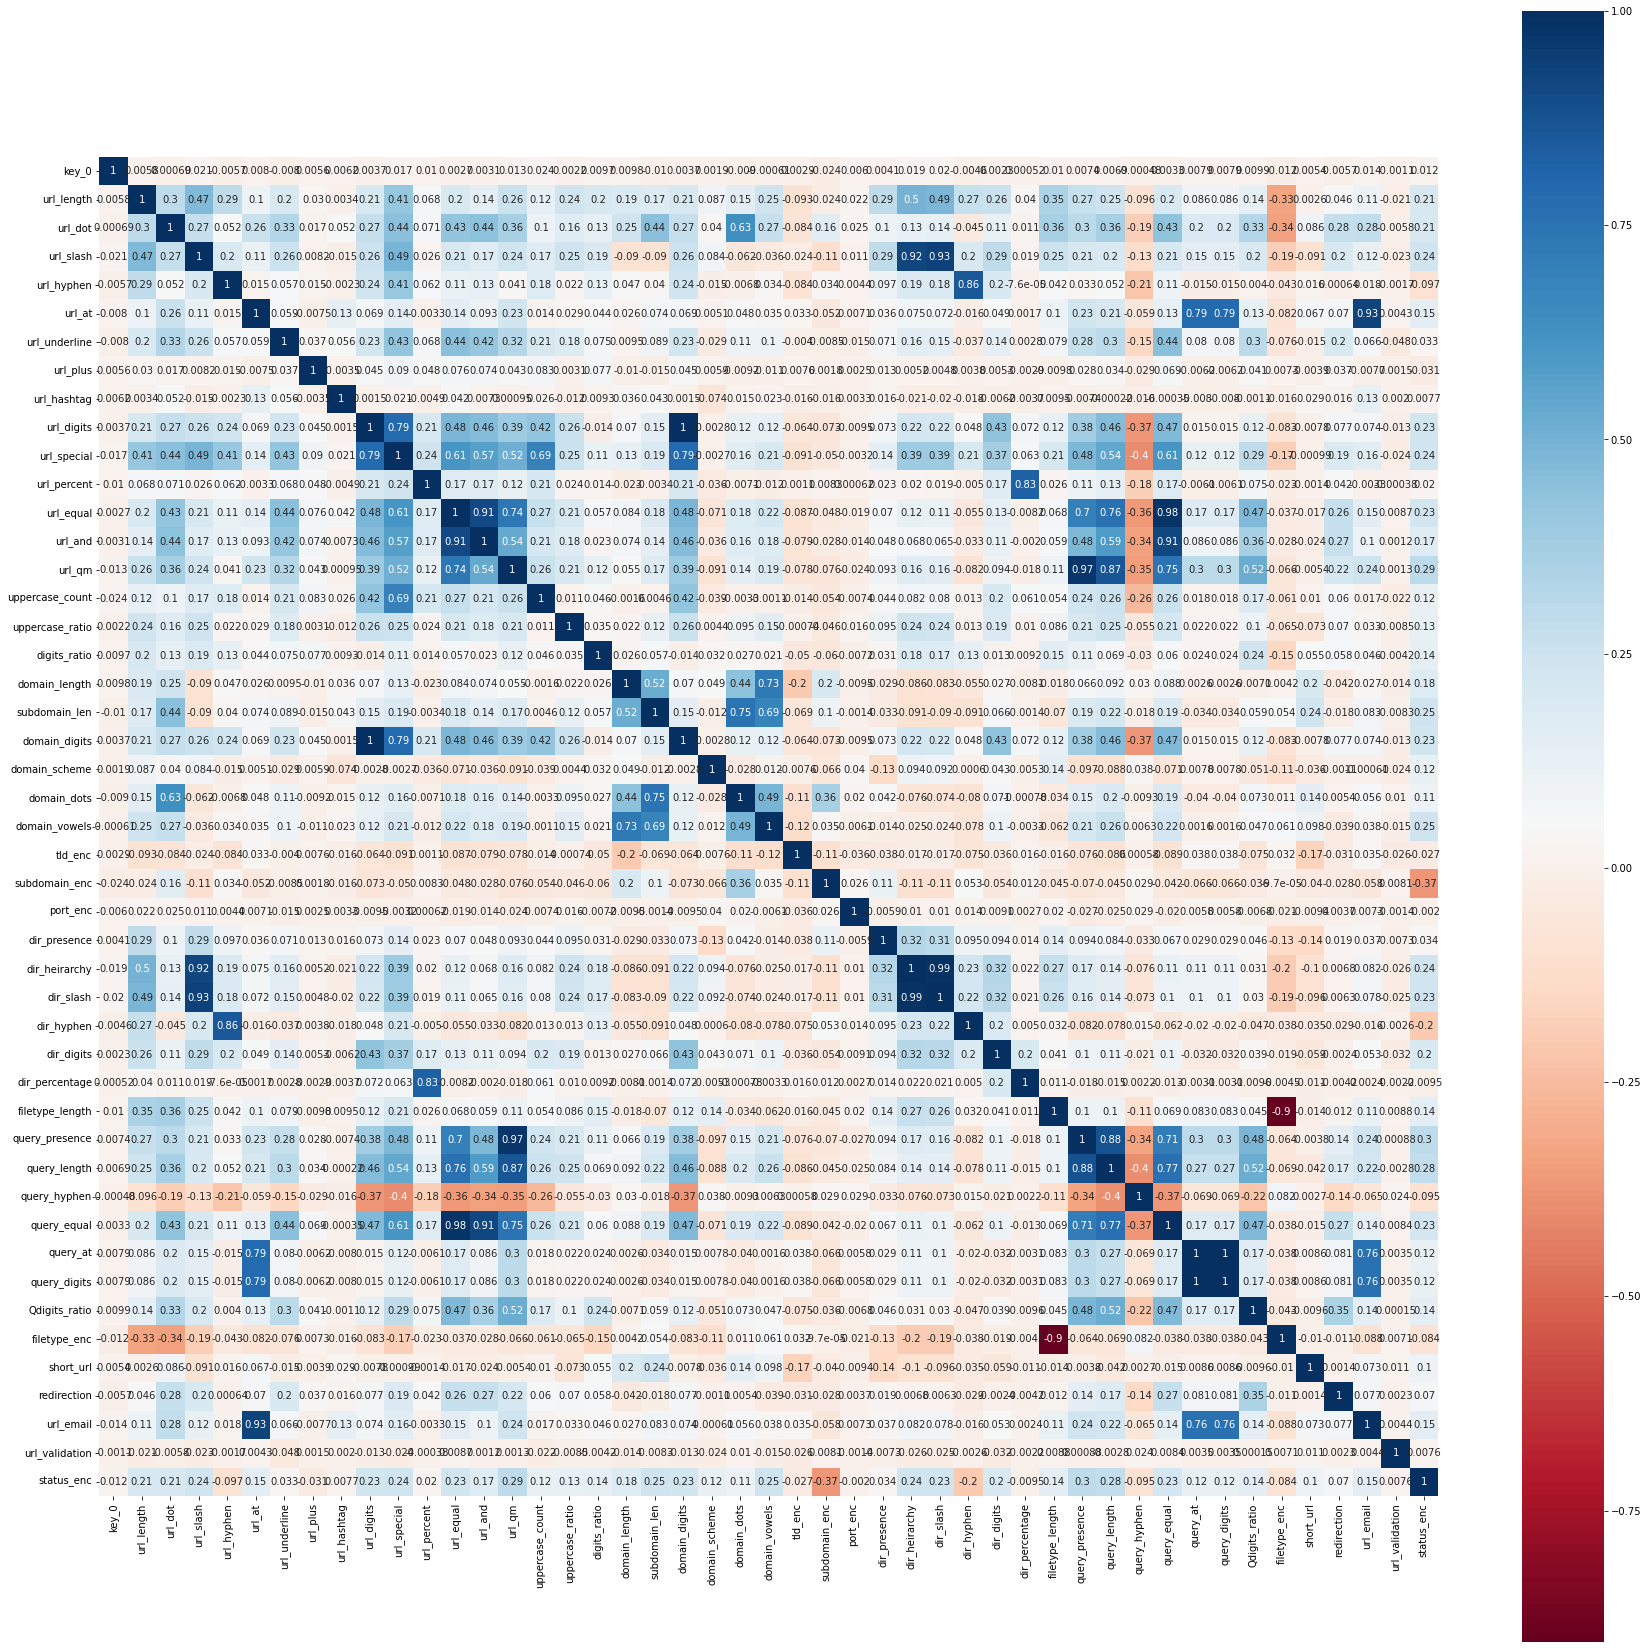

In [22]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('', y=2, size=20)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Model Training

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# clf_DT=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=18,
#                                      max_features=11, max_leaf_nodes=None,
#                                      min_impurity_decrease=0.0,
#                                      min_samples_leaf=1, min_samples_split=2,
#                                      min_weight_fraction_leaf=0.0, 
#                                      random_state=2, splitter='best')
clf_DT=DecisionTreeClassifier(random_state=0 , max_depth=18)
clf_DT.fit(X_train_chi, Y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

In [25]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)

Accuracy :  86.26 %
F1 :  85.89 %
Y axis : Actual Value.
X axis : Predicted Value.


1

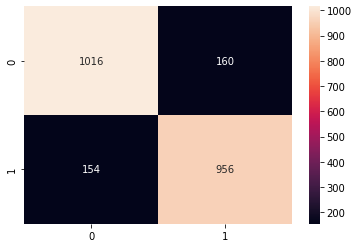

In [26]:
generate_accuracy_and_heatmap(clf_DT, X_test_chi, Y_test)

In [27]:
# # # with gridsearchCV
# tree_param = [{'criterion': ['entropy', 'gini'],'splitter' : ['best', 'random'],'min_samples_split':list(range(0,10)),'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'max_features': list(range(0,14))}]
# # tree_param = [{, 'max_leaf_nodes' :list(range(0,10))}]
# clf_DT=DecisionTreeClassifier()
# gs_DT=GridSearchCV(clf_DT, tree_param, cv = 3, scoring='accuracy')
# gs_DT.fit(X_train_chi, Y_train)

In [28]:
# print(gs_DT.best_params_)

In [29]:
# generate_accuracy_and_heatmap(gs_DT, X_test_chi, Y_test)

## Support Vector Machine

In [30]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train_chi, Y_train)

SVC()

Accuracy :  71.92 %
F1 :  72.28 %
Y axis : Actual Value.
X axis : Predicted Value.


1

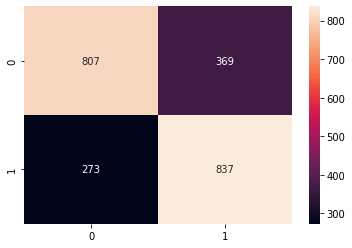

In [31]:
generate_accuracy_and_heatmap(clf_svm, X_test_chi, Y_test)

## Nu-Support Vector Classification.

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf_nsvc = make_pipeline(StandardScaler(), NuSVC())
clf_nsvc.fit(X_train_chi, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

Accuracy :  81.45 %
F1 :  81.09 %
Y axis : Actual Value.
X axis : Predicted Value.


1

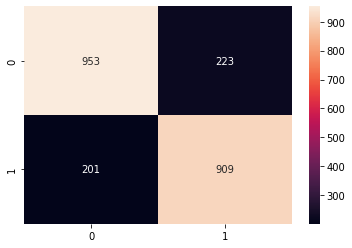

In [33]:
generate_accuracy_and_heatmap(clf_nsvc, X_test_chi, Y_test)

## Stochastic Gradient Descent

In [34]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train_chi, Y_train)

SGDClassifier()

Accuracy :  52.32 %
F1 :  66.21 %
Y axis : Actual Value.
X axis : Predicted Value.


1

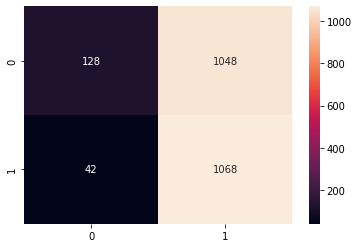

In [35]:
generate_accuracy_and_heatmap(clf_sgd, X_test_chi, Y_test)

## Gaussian Process Classification

In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf_gpc = GaussianProcessClassifier()
clf_gpc.fit(X_train_chi, Y_train)

GaussianProcessClassifier()

Accuracy :  80.97 %
F1 :  78.81 %
Y axis : Actual Value.
X axis : Predicted Value.


1

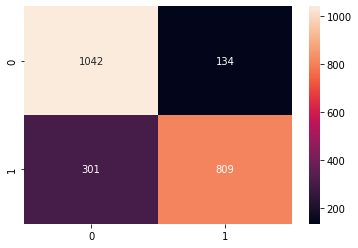

In [37]:
generate_accuracy_and_heatmap(clf_gpc, X_test_chi, Y_test)

## Multi-layer Perceptron

In [38]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()

clf_mlp.fit(X_train_chi, Y_train)

MLPClassifier()

Accuracy :  81.80 %
F1 :  79.16 %
Y axis : Actual Value.
X axis : Predicted Value.


1

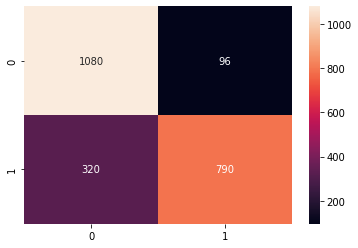

In [39]:
generate_accuracy_and_heatmap(clf_mlp, X_test_chi, Y_test)

## Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier()

clf_adaboost.fit(X_train_chi, Y_train)

AdaBoostClassifier()

Accuracy :  83.60 %
F1 :  82.90 %
Y axis : Actual Value.
X axis : Predicted Value.


1

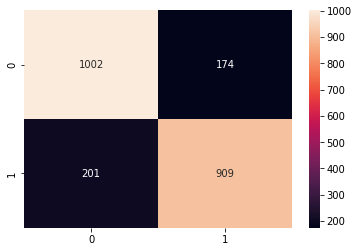

In [41]:
generate_accuracy_and_heatmap(clf_adaboost, X_test_chi, Y_test)

## Xgboost

[23:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  90.20 %
F1 :  89.85 %
Y axis : Actual Value.
X axis : Predicted Value.


1

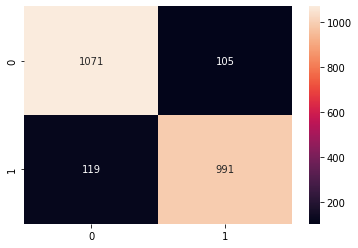

In [68]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=9, learning_rate=0.300000012, gamma=0, base_score=0.5, reg_alpha=0.4, reg_lambda=0.5, 
                            n_estimators=195)

xgb_clf.fit(X_train_chi, Y_train)
generate_accuracy_and_heatmap(xgb_clf, X_test_chi, Y_test)

In [43]:
# base_score=0.5, booster='gbtree', colsample_bylevel=1,
# colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
# gamma=0, gpu_id=-1, importance_type=None,
# interaction_constraints='', learning_rate=0.300000012,
# max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
# monotone_constraints='()', n_estimators=100, n_jobs=8,
# num_parallel_tree=1, predictor='auto', random_state=0,
# reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
# tree_method='exact', validate_parameters=1, verbosity=None

Accuracy :  91.43 %
F1 :  91.17 %
Y axis : Actual Value.
X axis : Predicted Value.


1

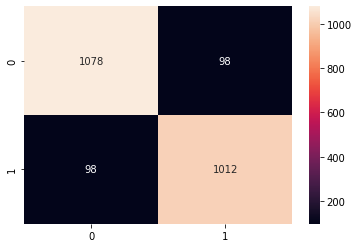

In [44]:
generate_accuracy_and_heatmap(xgb_clf, X_test_chi, Y_test)

## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
 
clf_knn.fit(X_train_chi, Y_train)

KNeighborsClassifier()

Accuracy :  83.90 %
F1 :  82.87 %
Y axis : Actual Value.
X axis : Predicted Value.


1

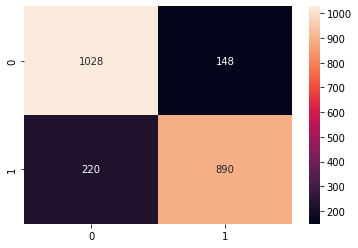

In [46]:
generate_accuracy_and_heatmap(clf_knn, X_test_chi, Y_test)

## Random Forest

Accuracy :  89.72 %
F1 :  89.51 %
Y axis : Actual Value.
X axis : Predicted Value.


1

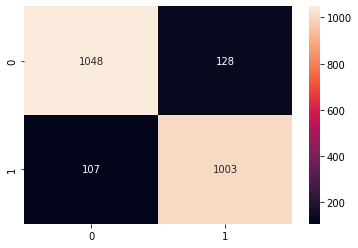

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(criterion='entropy', max_depth= 18)

clf_rf.fit(X_train_chi, Y_train)
generate_accuracy_and_heatmap(clf_rf, X_test_chi, Y_test)

In [48]:
# generate_accuracy_and_heatmap(clf_rf, X_test_chi, Y_test)

In [49]:
# # # with gridsearchCV1

In [50]:
# print(gs_rf.best_params_)

In [51]:
# generate_accuracy_and_heatmap(gs_rf, X_test_chi, Y_test)

## LightGBM

In [52]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier(max_depth=18, learning_rate=0.300000012, gamma=0, base_score=0.5, reg_alpha=0.4, reg_lambda=0.5,
                            n_estimators=195)
clf_lgbm.fit(X_train_chi, Y_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: base_score


LGBMClassifier(base_score=0.5, gamma=0, learning_rate=0.300000012, max_depth=18,
               n_estimators=195, reg_alpha=0.4, reg_lambda=0.5)

Accuracy :  91.29 %
F1 :  91.06 %
Y axis : Actual Value.
X axis : Predicted Value.


1

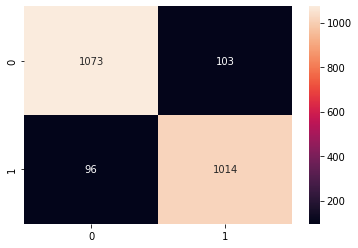

In [53]:
generate_accuracy_and_heatmap(clf_lgbm, X_test_chi, Y_test)

## Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_chi, Y_train)

GaussianNB()

Accuracy :  68.85 %
F1 :  56.21 %
Y axis : Actual Value.
X axis : Predicted Value.


1

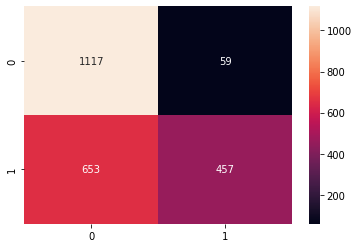

In [55]:
generate_accuracy_and_heatmap(clf_gnb, X_test_chi, Y_test)

## Multinomial Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_chi, Y_train)

MultinomialNB()

Accuracy :  70.87 %
F1 :  69.05 %
Y axis : Actual Value.
X axis : Predicted Value.


1

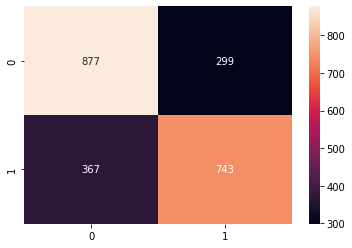

In [57]:
generate_accuracy_and_heatmap(clf_mnb, X_test_chi, Y_test)

## Complement Naive Bayes

In [58]:
from sklearn.naive_bayes import ComplementNB
clf_cnb = ComplementNB()
clf_cnb.fit(X_train_chi, Y_train)

ComplementNB()

Accuracy :  70.87 %
F1 :  69.05 %
Y axis : Actual Value.
X axis : Predicted Value.


1

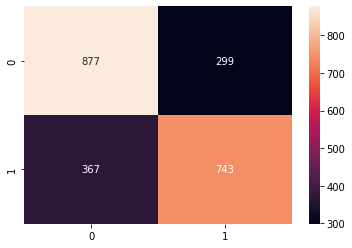

In [59]:
generate_accuracy_and_heatmap(clf_cnb, X_test_chi, Y_test)